In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
%matplotlib inline

In [9]:
# "C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Prepared Data\rgs_csv"
path = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6'

In [10]:
rgs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'rgs_csv'), index_col = 0)

In [11]:
rgs.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty,winner,first_shooter,match_time,match_winner,country_match_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,draw,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,draw,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,home win,Scotland


In [14]:
rgs.shape

(74518, 19)

In [16]:
rgs['match_winner'].value_counts(dropna = False)

match_winner
home win    38944
away win    21664
draw        13910
Name: count, dtype: int64

# Home scores increase as away scores decrease

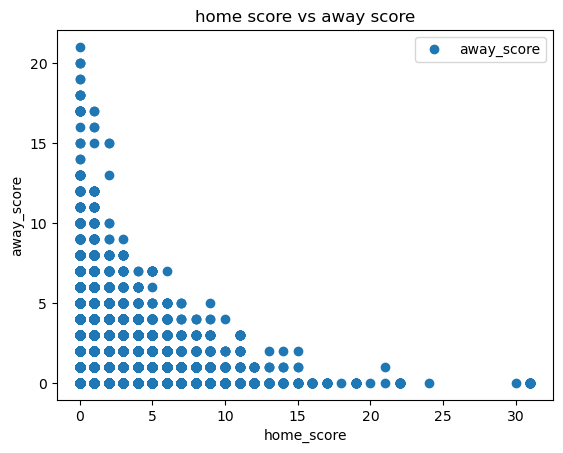

In [18]:
 # Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

rgs.plot(x = 'home_score', y='away_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('home score vs away score')  
plt.xlabel('home_score')  
plt.ylabel('away_score')  
plt.show()

In [20]:
# # Reshape the variables into NumPy arrays and put them into separate objects.

X = rgs['home_score'].values.reshape(-1,1)
y = rgs['away_score'].values.reshape(-1,1)

In [22]:
X

array([[0],
       [4],
       [2],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [23]:
y

array([[0],
       [2],
       [1],
       ...,
       [2],
       [1],
       [0]], dtype=int64)

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

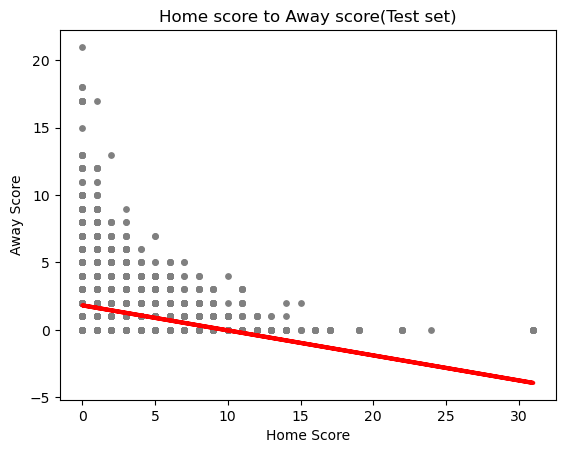

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Home score to Away score(Test set)')
plot_test.xlabel('Home Score')
plot_test.ylabel('Away Score')
plot_test.show()

## The model shows that the variables have a negative relationship with eachother. The graph else shows this is not that great of a model to compare the two variables

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.18573726]]
Mean squared error:  2.4465233617750917
R2 score:  0.06420086144789616


In [ ]:
# Root Mean Squared Error = estimator that measures avg of the squared diff. between estimated values and true values
# r-squared value (R2 score) = tells you how well the model explains the variance in the data

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,1,1.631221
1,0,1.816958
2,1,1.445483
3,2,0.702534
4,0,1.259746
5,1,1.074009
6,2,1.816958
7,0,0.702534
8,1,1.445483
9,3,1.816958


## This model has reacted as expected as the two variables are not dependent on each other. No biases could have affected the results.